
### Group-11

**ML System Optimization - Problem Statement 2**
    


<table border="1" style="font-size: 16px;">    
    <tr>
        <th>Name</th>
        <th>ID</th>
        <th>Email-ID</th>
        <th>Contribution</th>
    </tr>
    <tr>
        <td>GORLE PUSHPALATHA</td>
        <td>2022AA05415</td>
        <td>2022AA05415@wilp.bits-pilani.ac.in</td>
        <td>100%</td>
    </tr>
    <tr>
        <td>SHIVAM SAHIL</td>
        <td>2023AA0663</td>
        <td>2023AA0663@wilp.bits-pilani.ac.in</td>
        <td>100%</td>
    </tr>
    <tr>
        <td>SANKALP KUMAR YADAV</td>
        <td>2023AB05001</td>
        <td>2023AB05001@wilp.bits-pilani.ac.inn</td>
        <td>100%</td>
    </tr>
    <tr>
        <td>N NEHA</td>
        <td>2023AA05692</td>
        <td>2023AA05692@wilp.bits-pilani.ac.in</td>
        <td>100%</td>
    </tr>
</table>



**Dataset Used** - [Sci-kit Learn California Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [6]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


In [7]:
# Load the California housing dataset
housing = fetch_california_housing()
# Create a DataFrame from the dataset
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Load the dataset from Local File
# df = pd.read_csv(r'housing_data.csv') [We tried by loading dataset from local file first but the other method seems better]
# Separate the features and target
# X = df.drop('Target', axis=1).values
# y = df['Target'].values

df['Target'] = housing.target

# Separate the features and target
X = df.drop('Target', axis=1).values
y = df['Target'].values

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
'''
    we ensure that each feature contributes equally to the distance calculations during
    the training of models, thereby improving their performance and stability.
'''
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape y for consistency
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [10]:
# Multi Layer Perceptron Implementation

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.Z2  # Linear activation for regression
        return self.A2

    def backward(self, X, y):
        m = X.shape[0]
        dZ2 = self.A2 - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = np.mean((y_true - y_pred) ** 2)
        return loss


def train(model, X_train, y_train, epochs=1000, batch_size=32):
    history = []
    for epoch in range(epochs):
        permutation = np.random.permutation(X_train.shape[0])
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train_shuffled[i:i + batch_size]
            y_batch = y_train_shuffled[i:i + batch_size]

            # Forward and backward propagation
            y_pred = model.forward(X_batch)
            model.backward(X_batch, y_batch)

        # Compute and store the loss
        y_pred_full = model.forward(X_train)
        loss = model.compute_loss(y_train, y_pred_full)
        history.append(loss)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return history

# Helper function for Model Evaluation
def evaluate(model, X_test, y_test):
    y_pred = model.forward(X_test)
    mse = np.mean((y_test - y_pred) ** 2)
    return mse

Epoch 0, Loss: 0.8248496035977547
Epoch 100, Loss: 0.3620423409516167
Epoch 200, Loss: 0.3473772332353146
Epoch 300, Loss: 0.3708290731019825
Epoch 400, Loss: 0.32375686179813523
Epoch 500, Loss: 0.3201543695118343
Epoch 600, Loss: 0.3192456504291833
Epoch 700, Loss: 0.32037966806798834
Epoch 800, Loss: 0.3212785538277933
Epoch 900, Loss: 0.31679449405069837
Test Mean Squared Error: 0.33736649701624477


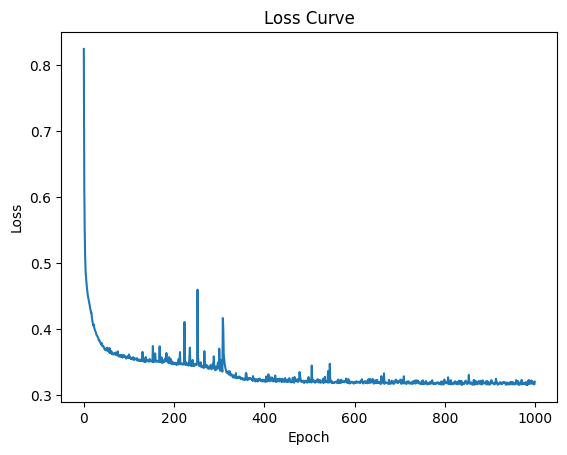

In [11]:
# Model configuration
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 1000
batch_size = 32

# Initialize the model
mlp = MLP(input_size, hidden_size, output_size, learning_rate)

# Train the model
loss_history = train(mlp, X_train, y_train, epochs, batch_size)

# Evaluate the model
mse = evaluate(mlp, X_test, y_test)
print(f'Test Mean Squared Error: {mse}')

# Plot the loss curve
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()